In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange
import inference

In [2]:
pipe = inference.InferencePipeline()

In [3]:
def show_blend(image_path, change):
    img = Image.open(image_path)
    mask = T.Resize((img.size[1], img.size[0]))(torch.tensor(change).unsqueeze(0))
    mask = mask.squeeze().numpy()
    img = np.array(img)[:, :, :3]
    color_add = np.array([255, 0, 0])
    color_fade = np.array([0, 0, 255])
    blended_img = img.copy()
    blended_img[mask == 1] = blended_img[mask == 1] * 0.4 + color_add * 0.6
    blended_img[mask == -1] = blended_img[mask == -1] * 0.4 + color_fade * 0.6
    plt.figure(figsize=(10, 8))
    plt.imshow(blended_img)
    plt.show()

In [5]:
'''
38200:
An example.

82230 51120:
SPOT(1.5m/pixel) has a bad performance on the test set.

09210:
weird result when processing correctly.
shows the defect of using 2 different resolutions.

Les_Hermitants:
seems to be good

Monnerie35340:
seems to have very large misalignment

RtedesVergnes:
Able to detect the change, but with some defects


'''

'\n82230 51120:\nSPOT(1.5m/pixel) has a bad performance on the test set.\n\n09210:\nweird result when processing correctly.\nshows the defect of using 2 different resolutions.\n\nLes_Hermitants:\nseems to be good\n\nMonnerie35340:\nseems to have very large misalignment\n\n\n'

In [5]:
image_path1 = "image_client/38200/IMG_PNEO3_202308091037033_PMS-FS_ORT_417a75c7-06d7-46c7-c61b-bd9e17f567ab_RGB_R1C1.TIF"
image_path0 = "image_client/38200/IMG_PNEO4_202205111036334_PMS-FS_ORT_999d0cef-9f8e-4176-c158-3cb7cb764895_RGB_R1C1.TIF"

# image_path1 = ""
# image_path0 = ""

# image_path1 = "image_client/Les_Hermitants/IMG_PHR1A_PMS_202308091107285_ORT_e4f31162-4a88-44b9-c436-10caa0b7bee6_R1C1.TIF"
# image_path0 = "image_client/Les_Hermitants/IMG_PHR1B_PMS_202212051107185_ORT_b3c11138-7d93-449c-c47f-c81267390c0a_R1C1.TIF"

# image_path1 = "image_client/Monnerie35340/IMG_PNEO4_202403291105502_PMS-FS_ORT_d3ade833-6cb5-4200-c229-7672ee67fa15_RGB_R1C1.TIF"
# image_path0 = "image_client/Monnerie35340/IMG_PNEO4_202305271102071_PMS-FS_ORT_be02489e-3ac9-4eac-cead-de14d98d33c4_RGB_R1C1.TIF"

# image_path1 = "image_client/RtedesVergnes/IMG_SPOT6_PMS_202403191025349_ORT_2e19aa66-3cbb-4a0b-cab7-f73d323580e7_R1C1.TIF"
# image_path0 = "image_client/RtedesVergnes/IMG_SPOT7_PMS_202207031033512_ORT_30387a3c-93a9-4a6b-cae6-4ff07285acfa_R1C1.TIF"

# image_path1 = "image_client/tapiniere/IMG_PHR1A_PMS_202404301118138_ORT_f2933749-49e7-4c17-cc97-dc65650d89cf_R1C1.TIF"
# image_path0 = "image_client/tapiniere/IMG_PHR1A_PMS_202304201111023_ORT_34fd0489-792f-4e77-ce89-1f27066f193f_R1C1.TIF"
# image_path0 = "image_client/tapiniere/IMG_PNEO3_202211291108332_PMS-FS_ORT_9579345c-d6cf-4d2a-cd44-bb1c5fea3edc_RGB_R1C1.TIF"

In [7]:
seg0, seg1 = pipe.compare(image_path0, image_path1, 0.3)

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

In [8]:
change = pipe.process(seg0.numpy(), seg1.numpy())

In [13]:
# plt.figure(figsize=(10, 8))
# plt.imshow(seg1 - seg0)

In [10]:
# plt.figure(figsize=(10, 8))
# plt.imshow(seg1)

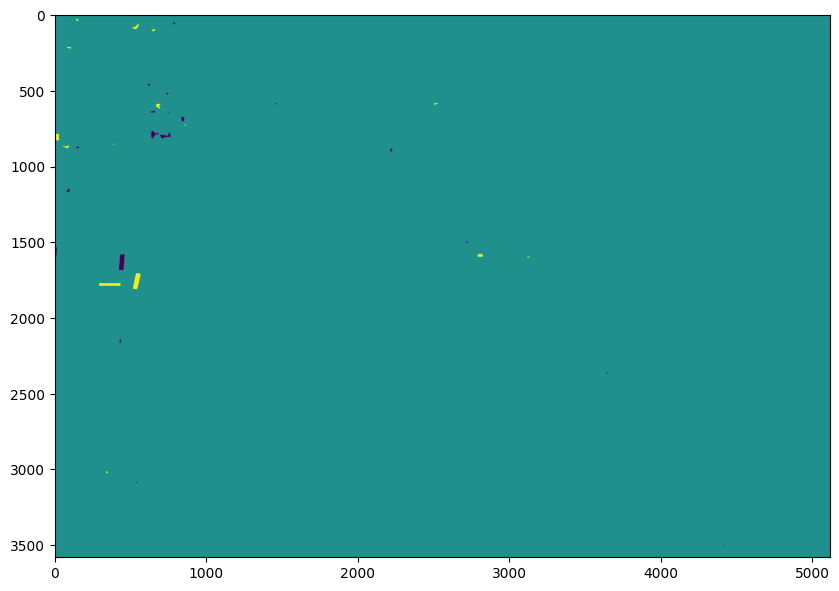

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(change)

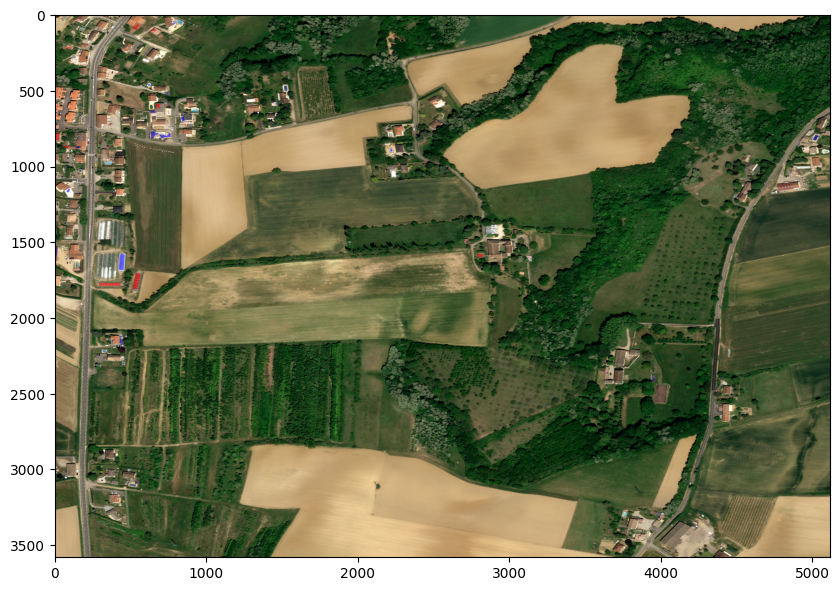

In [12]:
show_blend(image_path0, change)

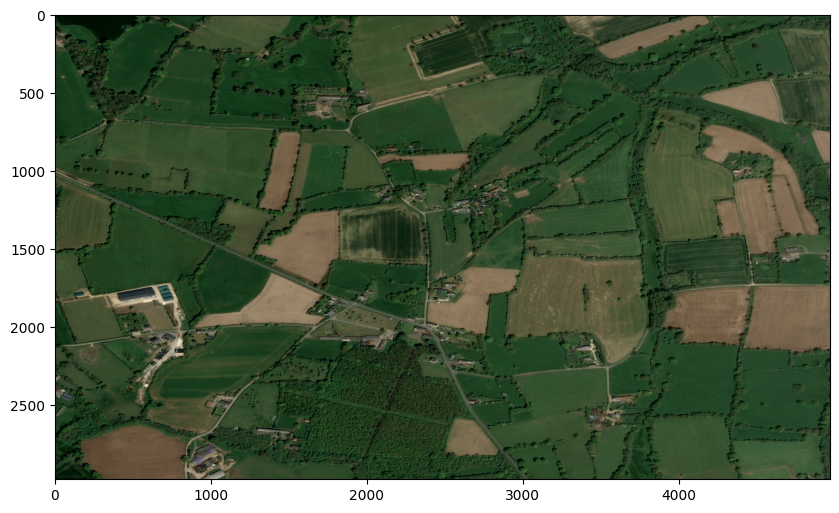

In [58]:
show_blend(image_path1, change)